## Projeto 3 - Ciência dos Dados


**Integrantes:**  

Murilo Lima de Campos Menezes  
Enrico Venturini Costa  
Roberto Schnorrenberg  

## Importando as bibliotecas necessárias

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as web

## Construindo o Dataset

In [84]:
ITUB4 = web.get_data_yahoo("ITUB4.SA",start="2001-01-02",end="2017-12-26")
VALE3 = web.get_data_yahoo("VALE3.SA",start="2001-01-02",end="2017-12-26")
PETR4 = web.get_data_yahoo("PETR4.SA",start="2001-01-02",end="2017-12-26")
WEGE3 = web.get_data_yahoo("WEGE3.SA",start="2001-01-02",end="2017-12-26")



DF1 = ITUB4.join(VALE3, how = 'inner', lsuffix = ': ITUB4', rsuffix = ': VALE3')
DF2 = PETR4.join(WEGE3, how = 'inner', lsuffix = ': PETR4', rsuffix = ': WEGE3')
dataset = DF1.join(DF2, how = 'inner')
dataset.head(5)


,High: ITUB4,Low: ITUB4,Open: ITUB4,Close: ITUB4,Volume: ITUB4,Adj Close: ITUB4,High: VALE3,Low: VALE3,Open: VALE3,Close: VALE3,...,Open: PETR4,Close: PETR4,Volume: PETR4,Adj Close: PETR4,High: WEGE3,Low: WEGE3,Open: WEGE3,Close: WEGE3,Volume: WEGE3,Adj Close: WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2.98026,2.90591,2.90608,2.96386,47010787.0,2.161765,3.60000,3.60000,3.60000,3.60000,...,5.72500,5.91250,32521600.0,4.132796,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-03,3.14600,2.94731,2.96386,3.07994,67061636.0,2.246431,3.83333,3.55833,3.58333,3.83333,...,5.88750,6.21250,60508800.0,4.342494,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-04,3.14600,3.09616,3.09616,3.12944,82788267.0,2.282535,3.83333,3.66667,3.83333,3.70833,...,6.21625,6.23750,46118400.0,4.359970,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-05,3.22879,3.04665,3.04665,3.14584,81568305.0,2.294497,3.66667,3.66667,3.66667,3.66667,...,6.25000,6.25000,41360000.0,4.368707,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-08,3.14600,3.07977,3.11289,3.07977,32069280.0,2.246307,3.66667,3.58333,3.66667,3.62500,...,6.25000,6.17375,35968000.0,4.315408,0.96154,0.46154,0.96154,0.46154,0.0,0.282328


## Análise das Ações

In [99]:
Close_ITUB4 = dataset["Adj Close: ITUB4"]
Close_VALE3 = dataset["Adj Close: VALE3"]
Close_PETR4 = dataset["Adj Close: PETR4"]
Close_WEGE3 = dataset["Adj Close: WEGE3"]

Text(0.5, 1.0, 'Stock Price Over Time')

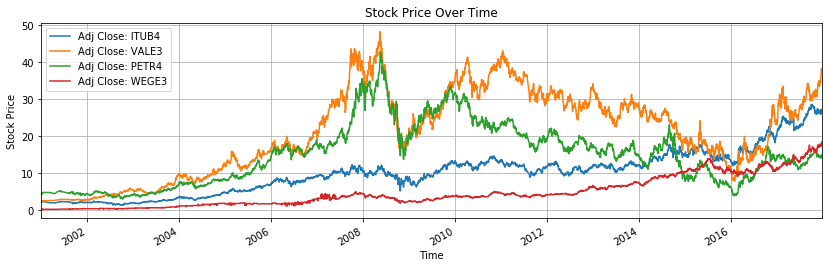

In [109]:
C = [Close_ITUB4, Close_VALE3, Close_PETR4, Close_WEGE3]

for i in C:
    i.plot(figsize=(14, 4))

plt.grid(True)
plt.legend()
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Stock Price Over Time")


**Bovespa**

Text(0.5, 1.0, 'Bovespa Index Over Time')

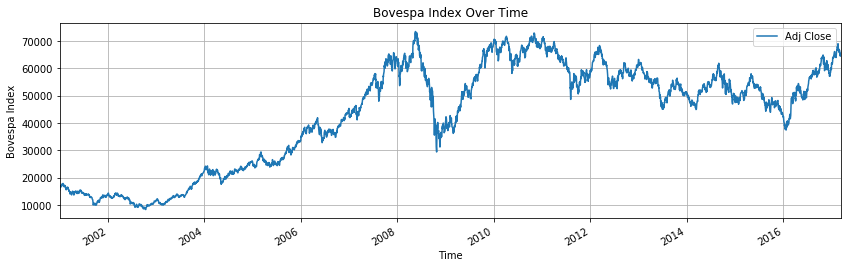

In [167]:
Close_bovespa = web.get_data_yahoo('^BVSP',start="2001-01-02",end="2017-03-13")['Adj Close']
Close_bovespa.plot(figsize=(14,4))
plt.grid(True)
plt.legend()
plt.ylabel("Bovespa Index")
plt.xlabel("Time")
plt.title("Bovespa Index Over Time")


## Análise ITUB4

**Stock Price over Time**

Text(0.5, 1.0, 'Stock Price Over Time')

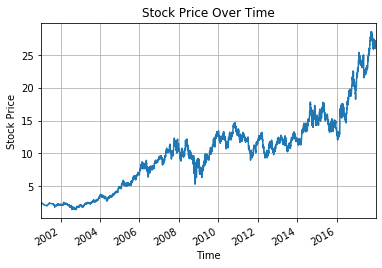

In [168]:
Close_ITUB4.plot()
plt.grid(True)
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Stock Price Over Time")



**2017 Daily Return**


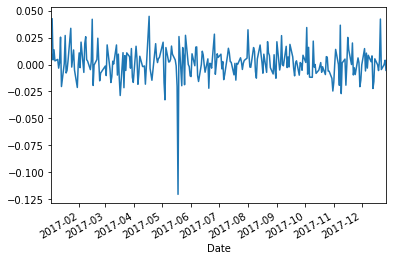

In [169]:
ITUB42017 = Close_ITUB4.tail(252)
DR2017 = ITUB42017.pct_change(1)
DR2017.plot()



**Correlação ITUB4 e Ibovespa**

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.9112131498559837
Coeficiente angular: 0.00021929132359216826


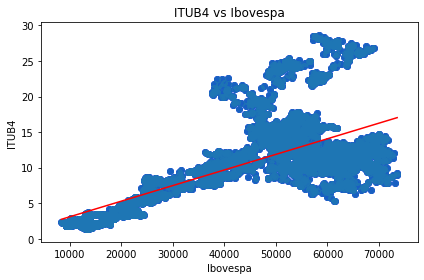

In [177]:
plt.scatter(Close_bovespa,Close_ITUB4,color="blue")
def reta(dados_x, dados_y):    
    a = dados_x.cov(dados_y) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, alpha=0.8)
    plt.title('ITUB4 vs Ibovespa')
    plt.xlabel('Ibovespa')
    plt.ylabel('ITUB4')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color="red")

    plt.tight_layout()
    
reta(Close_bovespa,Close_ITUB4)

In [176]:
print("Coeficiente de correlação: {}".format(Close_bovespa.corr(Close_ITUB4)))

Coeficiente de correlação: 0.8497349968894575


A variação de preço da ação ITUB4 apresenta forte correlação linear positiva com a variação do indice bovespa, uma vez que o coeficiente de correlação linear entre as duas é igual a 0.8497349968894575